# Model Building

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

### Loading the data

In [3]:
data = pd.read_csv("./preprocessed_data.csv")
data.head()

,Fwd Packets/s,Fwd IAT Min,Idle Mean,Fwd Header Length.1,Fwd IAT Std,Fwd IAT Max,Flow IAT Std,Subflow Fwd Packets,Total Fwd Packets,Fwd IAT Mean,...,Bwd Packet Length Max,Max Packet Length,Destination Port,Bwd Packet Length Mean,Avg Bwd Segment Size,Average Packet Size,Packet Length Mean,Min Packet Length,Bwd Packet Length Std,Label
0,6.362335,0,0.0,32,0.000000e+00,0,0.000000e+00,1,1,0.000000e+00,...,188,188,53,188.0,188.0,151.000000,100.666667,57,0.000000,BENIGN
1,27.990036,1,0.0,64,0.000000e+00,1,4.124966e+04,2,2,1.000000e+00,...,110,110,53,110.0,110.0,76.000000,60.800000,28,0.000000,BENIGN
2,14084.507040,4,0.0,64,0.000000e+00,4,7.592321e+01,2,2,4.000000e+00,...,112,112,53,112.0,112.0,94.250000,75.400000,51,0.000000,BENIGN
3,0.721199,294763,0.0,136,2.084758e+06,4217948,1.788425e+06,4,4,1.848772e+06,...,0,0,80,0.0,0.0,0.000000,0.000000,0,0.000000,BENIGN
4,40.806571,1122,0.0,152,1.682422e+04,48851,1.800531e+04,7,7,2.859017e+04,...,1460,1460,443,701.6,701.6,323.666667,298.769231,0,731.564625,BENIGN


### Function for plotting confusion matrix

In [4]:
def plot_binary_confusion_matrix(y_true, y_pred, title=None, cmap=plt.cm.Blues):
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels = ["BENIGN", "MALIGNANT"])
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Set class labels for binary classification
    classes = ["BENIGN", "MALIGNANT"]
    
    # Set classes as tick labels
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Add labels to axes
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    # Annotate the plot with the confusion matrix values
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    plt.show()

### Scaling and train/test splitting data

In [5]:
#Create target column and features table
y = data["Label"]
X = data.drop("Label", axis = 1)

#Delete rows with infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(axis = 0, inplace=True)

#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Scale the train features table
std = StandardScaler()
X_train = std.fit_transform(X_train)

#Scale the test features table
std = StandardScaler()
X_test = std.fit_transform(X_test)

### K Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#Search for optimal odd values of k in K nearest neighbor
k_range = [3, 5, 7, 9]
param_grid = dict(n_neighbors=k_range)

# Define parameter range
grid = GridSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy', return_train_score = False, verbose = 1)
  
# Fit the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [15]:
#Best parameter for model performance
print(grid_search.best_params_)

{'n_neighbors': 3}


Accuracy score:  0.9982343320199242


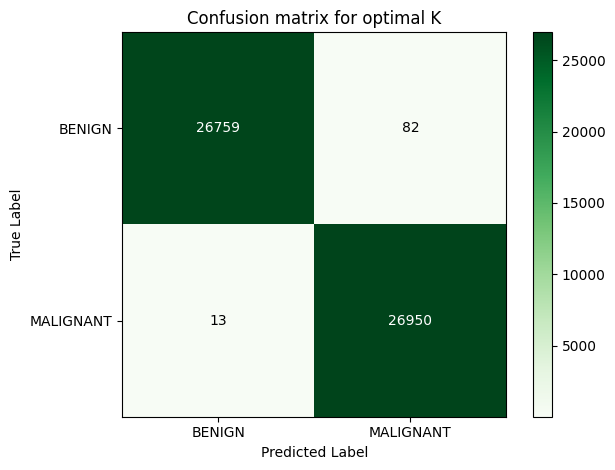

In [16]:
#Fit the model on train set with optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Print accuracy score
print('Accuracy score: ', accuracy_score(y_test, y_pred))

#Plot confusion matrix
plot_binary_confusion_matrix(y_test, y_pred, title = "Confusion matrix for optimal K", cmap = plt.cm.Greens)

Accuracy score:  0.9978068545089585


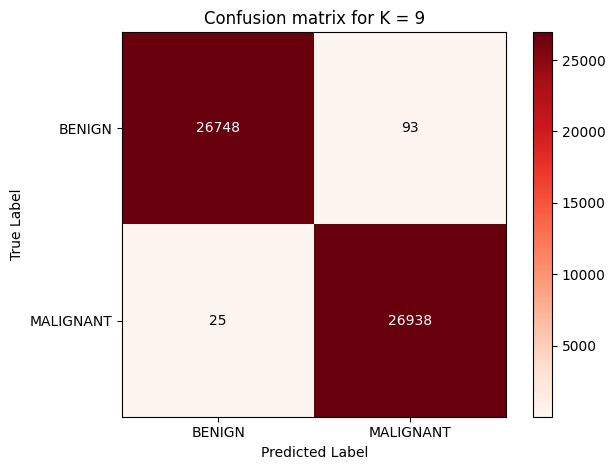

In [17]:
#Fit the model on train set with different number of neighbors
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Print accuracy score
print('Accuracy score: ', accuracy_score(y_test, y_pred))

#Plot confusion matrix
plot_binary_confusion_matrix(y_test, y_pred, title = "Confusion matrix for K = 9", cmap = plt.cm.Reds)

### Logistic Regression

Accuracy score:  0.9695004088915322


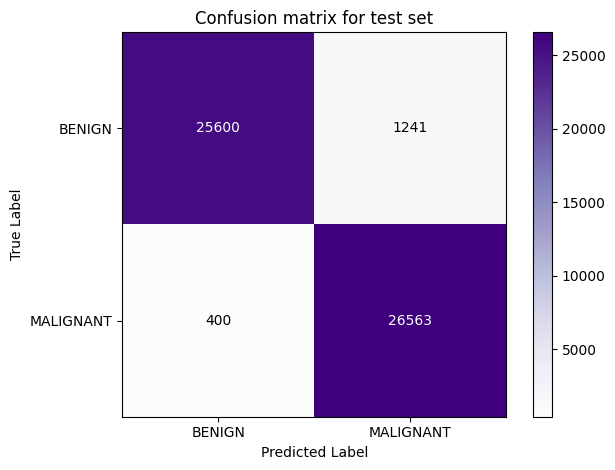

In [18]:
from sklearn.linear_model import LogisticRegression

# Fit standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

y_pred = lr.predict(X_test)

#Print accuracy score
print('Accuracy score: ', accuracy_score(y_test, y_pred))

plot_binary_confusion_matrix(y_test, y_pred, title = "Confusion matrix for test set", cmap = plt.cm.Purples)

Accuracy score:  0.9670466513846726


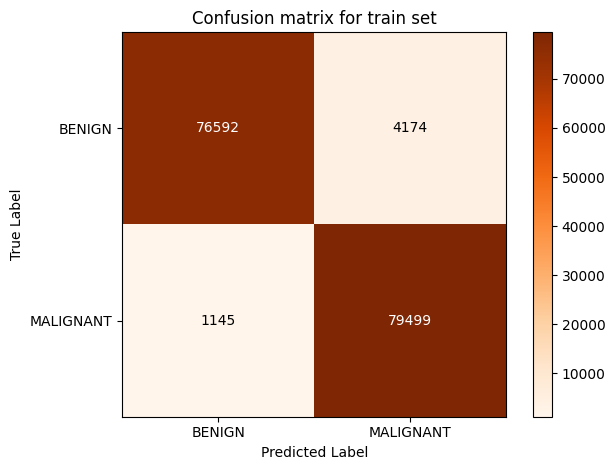

In [19]:
# Fit standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

#Print accuracy score for train set
print('Accuracy score: ', accuracy_score(y_train, y_pred_train))

plot_binary_confusion_matrix(y_train, y_pred_train, title = "Confusion matrix for train set", cmap = plt.cm.Oranges)

### Support Vector Machine

Accuracy score:  0.9751133744702996


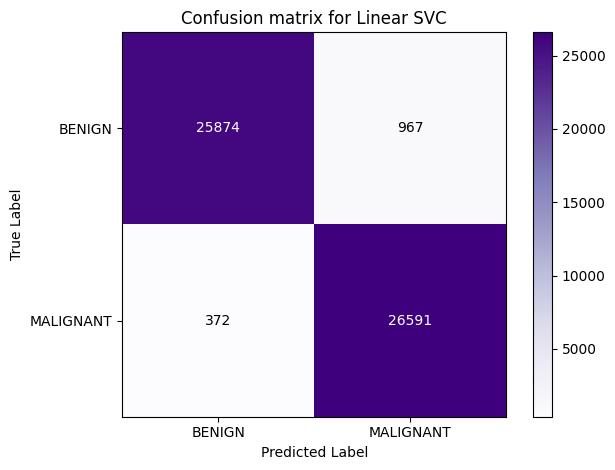

In [5]:
from sklearn.svm import LinearSVC

#Fit Linear Support Vector Classifier
LSVC = LinearSVC(max_iter = 3000, dual = False)
LSVC.fit(X_train, y_train)

#Predict test values
y_pred = LSVC.predict(X_test)

#Print accuracy score
print('Accuracy score: ', accuracy_score(y_test, y_pred))

plot_binary_confusion_matrix(y_test, y_pred, title = "Confusion matrix for Linear SVC", cmap = plt.cm.Purples)

In [8]:
from sklearn.svm import SVC

#Fit Gaussian Kernel SVC 
svc = SVC(kernel='rbf', max_iter = 3000)
svc.fit(X_train, y_train)

#Predict test values
y_pred = svc.predict(X_test)

c:\Users\Admir\anaconda3\envs\intrusion\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy score:  0.8455319307114713


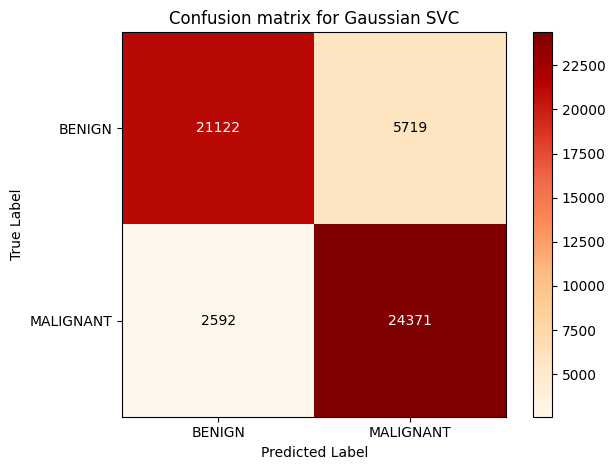

In [9]:
#Print accuracy score
print('Accuracy score: ', accuracy_score(y_test, y_pred))

plot_binary_confusion_matrix(y_test, y_pred, title = "Confusion matrix for Gaussian SVC", cmap = plt.cm.OrRd)

### Random Forest

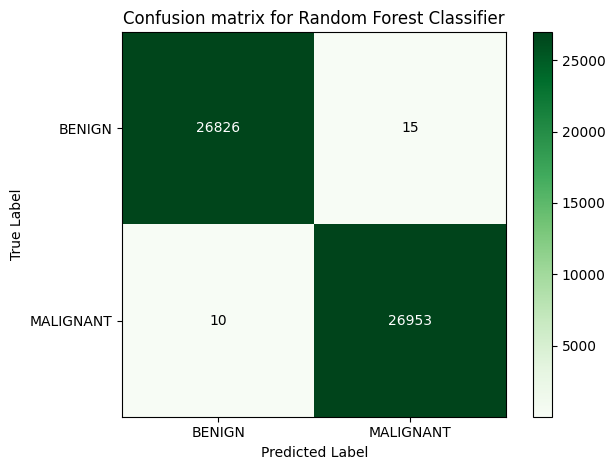

In [28]:
from sklearn.ensemble import RandomForestClassifier

#Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Create random forest model
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train.values, y_train.values)

#Make predictions on the test set
y_pred = rf.predict(X_test.values)

#Evaluate model accuracy
accuracy_score(y_test, y_pred, normalize=False)

plot_binary_confusion_matrix(y_test, y_pred, title = "Confusion matrix for Random Forest Classifier", cmap = plt.cm.Greens)

### Productionizing best-performing model

In [29]:
import pickle

pickl = {"model" : rf}
pickle.dump( pickl, open( "model_file" + ".p", "wb"))

In [30]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

'MALIGNANT'

In [31]:
list(X_test.iloc[1,:])

[500000.0,
 4.0,
 0.0,
 64.0,
 0.0,
 4.0,
 0.0,
 2.0,
 2.0,
 4.0,
 0.0,
 4.0,
 64.0,
 0.0,
 0.0,
 0.0,
 4.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 274.0,
 0.0,
 0.0,
 0.0,
 80.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]